<a href="https://colab.research.google.com/github/viriditass/Miscellaneous/blob/main/pascal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2012 Pascal VOC 데이터셋**

링크: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

In [5]:
!tar -xvf './VOCtrainval_11-May-2012.tar'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [6]:
!ls

img_align_celeba  img_align_celeba.zip	VOCdevkit  VOCtrainval_11-May-2012.tar


In [7]:
cd /content/drive/MyDrive/data/VOCdevkit/VOC2012

/content/drive/MyDrive/data/VOCdevkit/VOC2012


In [8]:
!ls

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


**JPEGImages** 폴더안에 있는 임의의 이미지 시각화

img shape:  (281, 500, 3)


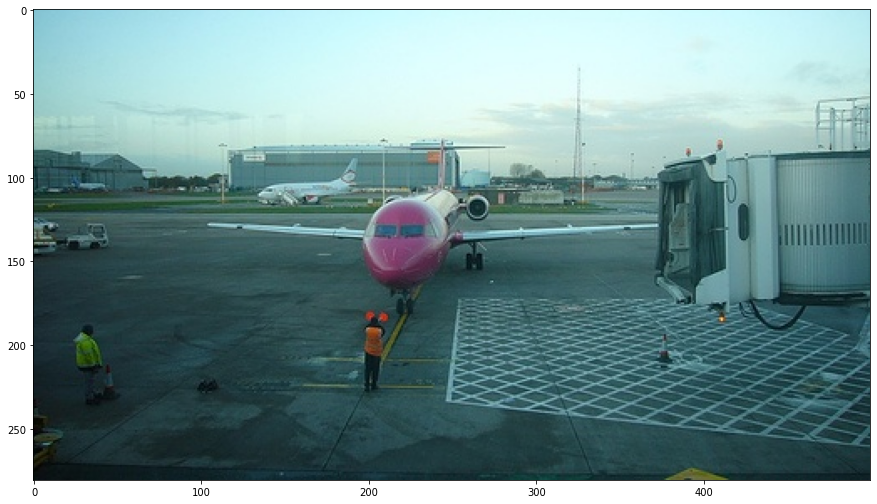

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./JPEGImages/2007_000032.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(15,15))
plt.imshow(img_rgb)
plt.show()

**Annotations** 폴더 안에 있는 임의의 annotation 파일 보기

In [10]:
!cat './Annotations/2007_000032.xml'

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

이미지의 크기 정보, segmentation 여부 (1 or 0), object들의 **정보인 class와 lotation**(위의 경우는 4개)가 있는 것을 볼 수 있다.

**SegmentationObject** 폴더안에 있는 임의의 masking 이미지 보기

img shape:  (281, 500, 3)


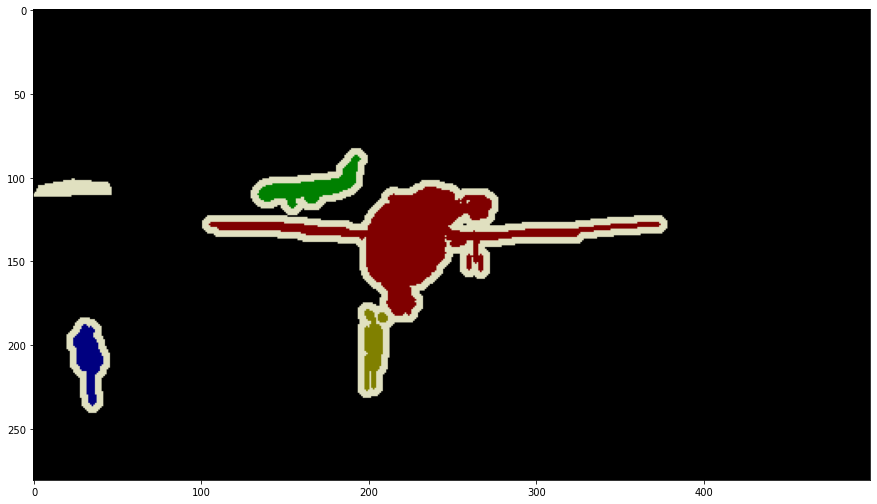

In [11]:
img = cv2.imread('./SegmentationObject/2007_000032.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(15,15))
plt.imshow(img_rgb)
plt.show()

Annotation xml 파일안에 있는 정보들을 파싱하여 접근

In [29]:
import os
import random

VOC_root_dir = '../../../data/VOCdevkit/VOC2012'
Anno_dir = os.path.join(VOC_root_dir, 'Annotations')
Image_dir = os.path.join(VOC_root_dir, 'JPEGImages')

xml_files = os.listdir(Anno_dir)
print(xml_files[:5])
print('xml 파일 수: ', len(xml_files))

['2007_000027.xml', '2007_000032.xml', '2007_000033.xml', '2007_000039.xml', '2007_000042.xml']
xml 파일 수:  17125


In [30]:
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(Anno_dir, '2007_000032.xml')

xml file를 Parsing하여 Element 생성

In [31]:
tree = ET.parse(xml_file)
root = tree.getroot()

image관련 정보는 root의 자식으로 존재

In [34]:
image_name = root.find('filename').text
full_image_name = os.path.join(Image_dir, image_name)
size = root.find('size')
width = int(size.find('width').text)
height = int(size.find('height').text)

file내에 있는 모든 object Element를 찾기

In [37]:
objects_list = []

for obj in root.findall('object'):
  # object element의 자식 element에서 bounding box 찾기
  xml_box = obj.find('bndbox')
  # bndbox(bounding box) element 자식 element에서 xmin, ymin, xmax, ymax 값 추출
  x1 = int(xml_box.find('xmin').text)
  y1 = int(xml_box.find('ymin').text)
  x2 = int(xml_box.find('xmax').text)
  y2 = int(xml_box.find('ymax').text)

  bndbox_pos = (x1, y1, x2, y2)
  class_name = obj.find('name').text
  object_dict = {'class_name': class_name, 'bndbox_pos': bndbox_pos}
  objects_list.append(object_dict)

print('full_image_name: ', full_image_name)
print('image_size: ', (width, height))

for obj in objects_list:
  print(obj)

full_image_name:  ../../../data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg
image_size:  (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


얻은 정보를 기반하여 bounding box 시각화

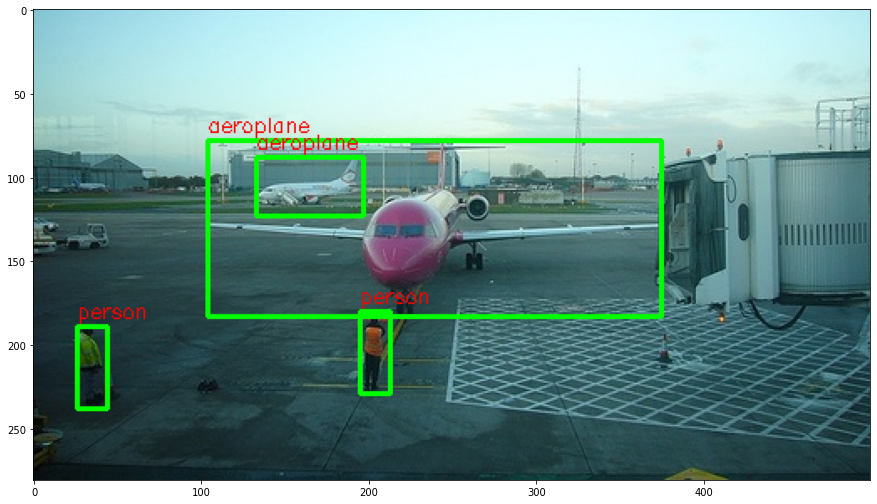

In [39]:
img = cv2.imread(full_image_name)
draw_img = img.copy()

green_color = (0, 255, 0)
red_color = (0, 0, 255)

for obj in objects_list:
  name = obj['class_name']
  left = obj['bndbox_pos'][0]
  top = obj['bndbox_pos'][1]
  right = obj['bndbox_pos'][2]
  bottom = obj['bndbox_pos'][3]

  cv2.rectangle(draw_img, (left,top), (right,bottom), color=green_color, thickness=2)
  cv2.putText(draw_img, name, (left,top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)  

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.show()